In [1]:
import sys 
sys.executable


'C:\\Users\\Changho_Notebook\\anaconda3\\python.exe'

In [2]:
import os
import re
import numpy as np
from tqdm import tqdm

import tensorflow as tf
from transformers import *

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

C:\Users\Changho_Notebook\anaconda3\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\Changho_Notebook\anaconda3\lib\site-packages\torchaudio\backend\utils.py:88: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


In [3]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
import re
import numpy as np
from tqdm import tqdm

import tensorflow as tf
from transformers import *

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"


In [4]:
data = pd.read_csv('./data/test_data0415.csv', encoding = 'euc-kr')
data

,Text,Feeling,Talking,book_id,sentence_id,Feeling_Saltlux
0,"‘인도’가 적에게 포위를 당했는데, 적들이 은화 6백 개를 내놓을 때까지 물러나지 ...",2.0,0,5001,1,분노
1,"그래서 주민들이 북을 치며 선포하길,",2.0,0,5001,2,공포
2,*누구든 그 돈을 마련하는 사람을 시장으로 삼겠다*,2.0,1,5001,3,기대
3,라고 했답니다,0.0,0,5001,4,신뢰
4,"때마침 가난한 어부가 자신의 아들과 호수에서 물고기를 잡아 생활하다, 그 적들이 들...",5.0,0,5001,5,혐오
...,...,...,...,...,...,...
12372,그런데 그 호랑이는 바로 옛날에 나무꾼이 도와주었던 호랑이였습니다,4.0,0,7009,30,신뢰
12373,*저는 나이가 들어 어차피 죽을 목숨이니 저를 임금에게 제물로 바치십시오*,4.0,1,7009,31,분노
12374,그러곤 호랑이는 숨을 거두었습니다,4.0,0,7009,32,신뢰
12375,나무꾼은 숨을 거둔 호랑이를 차마 제물로 바치지 못하고 양지바른 땅에 묻어주었습니다,4.0,0,7009,33,혐오


In [5]:
data = data.iloc[:,:2]
data['Text'].nunique(), data['Feeling'].nunique()
display(data[data.duplicated()])

,Text,Feeling
54,라고 말했어요,0.0
172,"*젬지 산아, 젬지 산아, 열리거라*",2.0
215,라고 그가 말했어요,0.0
316,라며 당나귀가 말했어요,0.0
325,라며 그가 말했어요,0.0
...,...,...
11941,라며 여왕폐하가 말했어요,0.0
11949,라며 앨리스가 말했지요,0.0
11950,*저 애의 목을 쳐라*,3.0
11953,라며 앨리스가 말했어요,0.0


<AxesSubplot:>

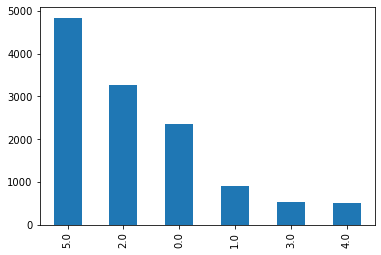

In [6]:
data['Feeling'].value_counts().plot(kind='bar')

In [7]:
#  결측치 제거
data.isnull().sum()
data = data.dropna(how = 'any')
data = data.astype({"Feeling" : 'int64'})
data['Feeling']

0        2
1        2
2        2
3        0
4        5
        ..
12372    4
12373    4
12374    4
12375    4
12376    4
Name: Feeling, Length: 12372, dtype: int64

In [8]:
# 한글만 남기기 
data['Text'] = data['Text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data

,Text,Feeling
0,인도가 적에게 포위를 당했는데 적들이 은화 백 개를 내놓을 때까지 물러나지 않겠다고...,2
1,그래서 주민들이 북을 치며 선포하길,2
2,누구든 그 돈을 마련하는 사람을 시장으로 삼겠다,2
3,라고 했답니다,0
4,때마침 가난한 어부가 자신의 아들과 호수에서 물고기를 잡아 생활하다 그 적들이 들이...,5
...,...,...
12372,그런데 그 호랑이는 바로 옛날에 나무꾼이 도와주었던 호랑이였습니다,4
12373,저는 나이가 들어 어차피 죽을 목숨이니 저를 임금에게 제물로 바치십시오,4
12374,그러곤 호랑이는 숨을 거두었습니다,4
12375,나무꾼은 숨을 거둔 호랑이를 차마 제물로 바치지 못하고 양지바른 땅에 묻어주었습니다,4


In [9]:
train_data = data[:9900]
test_data  = data[9900:]

In [10]:
# 시각화

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [11]:
train_length  = train_data['Text'].apply(len)

In [12]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 최소 값: {}'.format(np.min(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 259
문장 길이 최소 값: 1
문장 길이 평균 값: 33.54
문장 길이 표준편차: 23.22
문장 길이 중간 값: 29.0
문장 길이 제 1 사분위: 16.0
문장 길이 제 3 사분위: 45.0


In [13]:
#random seed 고정
tf.random.set_seed(1234)
np.random.seed(1234)

BATCH_SIZE = 32
NUM_EPOCHS = 20
VALID_SPLIT = 0.2
MAX_LEN = 45 # EDA에서 추출된 Max Length
DATA_IN_PATH = 'data_in/KOR'
DATA_OUT_PATH = "data_out/KOR"

In [14]:
train_data.shape, test_data.shape

((9900, 2), (2472, 2))

In [15]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

In [16]:
def bert_tokenizer(sent, MAX_LEN):
    
    encoded_dict = tokenizer.encode_plus(
        text = sent,
        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
        max_length = MAX_LEN,           # Pad & truncate all sentences.
        pad_to_max_length = True,
        return_attention_mask = True   # Construct attn. masks.
        
    )
    
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask'] # And its attention mask (simply differentiates padding from non-padding).
    token_type_id = encoded_dict['token_type_ids'] # differentiate two sentences
    
    return input_id, attention_mask, token_type_id

In [17]:
input_ids = []
attention_masks = []
token_type_ids = []
train_data_labels = []

for train_sent, train_label in tqdm(zip(train_data["Text"], train_data["Feeling"]), total=len(train_data)):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(train_sent, MAX_LEN)
        
        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        train_data_labels.append(train_label)

    except Exception as e:
        print(e)
        print(train_sent)
        pass

train_movie_input_ids = np.array(input_ids, dtype=int)
train_movie_attention_masks = np.array(attention_masks, dtype=int)
train_movie_type_ids = np.array(token_type_ids, dtype=int)
train_movie_inputs = (train_movie_input_ids, train_movie_attention_masks, train_movie_type_ids)

train_data_labels = np.asarray(train_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("# sents: {}, # labels: {}".format(len(train_movie_input_ids), len(train_data_labels)))

100%|████████████████████████████████████████████████████████████████████████████| 9900/9900 [00:02<00:00, 4490.63it/s]


# sents: 9900, # labels: 9900


In [18]:
# 최대 길이: 45
input_id = train_movie_input_ids[1]
attention_mask = train_movie_attention_masks[1]
token_type_id = train_movie_type_ids[1]

print(input_id)
print(attention_mask)
print(token_type_id)
print(tokenizer.decode(input_id))

[   101   8924  37388  12424   9689  36553  20173   9366  10622   9779
  21406   9428  55530  35506 118666    102      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[CLS] 그래서 주민들이 북을 치며 선포하길 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [19]:
class TFBertClassifier(tf.keras.Model):
    def __init__(self, model_name, dir_path, num_class):
        super(TFBertClassifier, self).__init__()

        self.bert = TFBertModel.from_pretrained(model_name, cache_dir=dir_path)
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(num_class, 
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), 
                                                name="classifier")
        
    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):
        
        #outputs 값: # sequence_output, pooled_output, (hidden_states), (attentions)
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs[1] 
        pooled_output = self.dropout(pooled_output, training=training)
        logits = self.classifier(pooled_output)

        return logits

cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased',
                                  dir_path='bert_ckpt',
                                  num_class=6)

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [26]:
cls_model.summary()

Model: "tf_bert_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tf_bert_model (TFBertModel)  multiple                  177853440 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  4614      
Total params: 177,858,054
Trainable params: 177,858,054
Non-trainable params: 0
_________________________________________________________________


In [20]:
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [21]:
model_name = "tf2_bert_naver_movie"

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=5)

# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=2, save_best_only=True, save_weights_only=True)

# 학습과 eval 시작
history = cls_model.fit(train_movie_inputs,
                        train_data_labels,
                        epochs=NUM_EPOCHS,
                        shuffle = True,
                        batch_size=BATCH_SIZE,
                        validation_split = VALID_SPLIT,
                        callbacks=[earlystop_callback, cp_callback])

#steps_for_epoch

print(history.history)

data_out/KOR\tf2_bert_naver_movie -- Folder already exists 

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
248/248 [==============================] - 140s 481ms/step - loss: 1.4081 - accuracy: 0.4358 - val_loss: 1.3421 - val_accuracy: 0.4924

Epoch 00001: val_accuracy improved from -inf to 0.

In [22]:
input_ids = []
attention_masks = []
token_type_ids = []
test_data_labels = []

for test_sent, test_label in tqdm(zip(test_data["Text"], test_data["Feeling"])):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(test_sent, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        test_data_labels.append(test_label)
    except Exception as e:
        print(e)
        print(test_sent)
        pass

test_movie_input_ids = np.array(input_ids, dtype=int)
test_movie_attention_masks = np.array(attention_masks, dtype=int)
test_movie_type_ids = np.array(token_type_ids, dtype=int)
test_movie_inputs = (test_movie_input_ids, test_movie_attention_masks, test_movie_type_ids)

test_data_labels = np.asarray(test_data_labels, dtype=np.int32) #레이블 토크나이징 리스트

print("num sents, labels {}, {}".format(len(test_movie_input_ids), len(test_data_labels)))

2472it [00:00, 4386.94it/s]


num sents, labels 2472, 2472


In [23]:
results = cls_model.evaluate(test_movie_inputs, test_data_labels, batch_size=16)
print("test loss, test acc: ", results)

155/155 [==============================] - 14s 90ms/step - loss: 2.1129 - accuracy: 0.4171
test loss, test acc:  [2.1129209995269775, 0.4170711934566498]


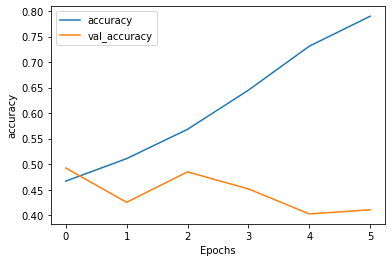

In [24]:
plot_graphs(history, 'accuracy')

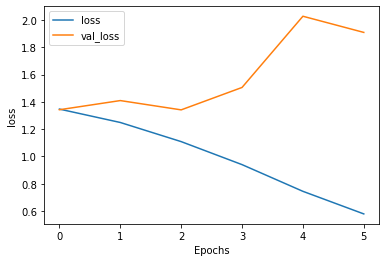

In [25]:
plot_graphs(history, 'loss')


In [26]:
! nvidia-smi

Thu Apr 22 10:42:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.92       Driver Version: 461.92       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 166... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   57C    P0    30W /  N/A |   5443MiB /  6144MiB |     26%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [50]:
tf.config.experimental.list_physical_devices(device_type='GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [24]:
!nvidia-smi

Thu Apr 22 09:41:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.92       Driver Version: 461.92       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 166... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   47C    P8     5W /  N/A |   5427MiB /  6144MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1348355356725349471
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4971491488
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14250438698411924273
physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
